Binary Classification using Tensorflow and Keras by developing Feed-Forward Neural Networks.

Problem: Predicting 'red wine quality'. If Quality >= 5.5, then it is 'good wine'.

---

Initial Step: Load the Data

In [48]:
import numpy as np
dataset = np.loadtxt('WineQT.csv', delimiter=',', skiprows=1, usecols=range(12))

print(dataset.shape)

(1143, 12)


In [49]:
import pandas as pd

df = pd.DataFrame(dataset)
print(df.head())


     0     1     2    3      4     5     6       7     8     9    10   11
0   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  5.0
1   7.8  0.88  0.00  2.6  0.098  25.0  67.0  0.9968  3.20  0.68  9.8  5.0
2   7.8  0.76  0.04  2.3  0.092  15.0  54.0  0.9970  3.26  0.65  9.8  5.0
3  11.2  0.28  0.56  1.9  0.075  17.0  60.0  0.9980  3.16  0.58  9.8  6.0
4   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  5.0


In [54]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [55]:
df = df.drop(columns=['Id'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [57]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [58]:
dataset = df.to_numpy()

Key Questions are
1) How many rows and columns does the data have?
2) How do we load a dataset that has non-numbers?
    - To do so, you could load the dataset in a separate file, and write a script to convert non-numerical data to numerical.

---

In [59]:
print(np.unique(dataset[:, -1]))  # See unique values

[3.00 4.00 5.00 6.00 7.00 8.00]


Step 1: Preview the first 5 rows.

In [60]:
# Prints only floating point numbers with a 2 decimal point precision. 
np.set_printoptions(formatter={'float': lambda x: '{0:0.2f}'.format(x)})

print(dataset[0:20, :])  # Display rows 0 to 4 with all columns

[[7.40 0.70 0.00 1.90 0.08 11.00 34.00 1.00 3.51 0.56 9.40 5.00]
 [7.80 0.88 0.00 2.60 0.10 25.00 67.00 1.00 3.20 0.68 9.80 5.00]
 [7.80 0.76 0.04 2.30 0.09 15.00 54.00 1.00 3.26 0.65 9.80 5.00]
 [11.20 0.28 0.56 1.90 0.07 17.00 60.00 1.00 3.16 0.58 9.80 6.00]
 [7.40 0.70 0.00 1.90 0.08 11.00 34.00 1.00 3.51 0.56 9.40 5.00]
 [7.40 0.66 0.00 1.80 0.07 13.00 40.00 1.00 3.51 0.56 9.40 5.00]
 [7.90 0.60 0.06 1.60 0.07 15.00 59.00 1.00 3.30 0.46 9.40 5.00]
 [7.30 0.65 0.00 1.20 0.07 15.00 21.00 0.99 3.39 0.47 10.00 7.00]
 [7.80 0.58 0.02 2.00 0.07 9.00 18.00 1.00 3.36 0.57 9.50 7.00]
 [6.70 0.58 0.08 1.80 0.10 15.00 65.00 1.00 3.28 0.54 9.20 5.00]
 [5.60 0.61 0.00 1.60 0.09 16.00 59.00 0.99 3.58 0.52 9.90 5.00]
 [7.80 0.61 0.29 1.60 0.11 9.00 29.00 1.00 3.26 1.56 9.10 5.00]
 [8.50 0.28 0.56 1.80 0.09 35.00 103.00 1.00 3.30 0.75 10.50 7.00]
 [7.90 0.32 0.51 1.80 0.34 17.00 56.00 1.00 3.04 1.08 9.20 6.00]
 [7.60 0.39 0.31 2.30 0.08 23.00 71.00 1.00 3.52 0.65 9.70 5.00]
 [7.90 0.43 0.21 1.60 0

---

Step 2: Prepare the output

If the last column is less than 5.5, set it to 0, otherwise 1.
- (good wine = 1, bad wine = 0)

In [61]:
dataset[dataset[:, -1] < 5.5, -1] = 0
dataset[dataset[:, -1] >= 5.5, -1] = 1

print(dataset[0:20, :])

[[7.40 0.70 0.00 1.90 0.08 11.00 34.00 1.00 3.51 0.56 9.40 0.00]
 [7.80 0.88 0.00 2.60 0.10 25.00 67.00 1.00 3.20 0.68 9.80 0.00]
 [7.80 0.76 0.04 2.30 0.09 15.00 54.00 1.00 3.26 0.65 9.80 0.00]
 [11.20 0.28 0.56 1.90 0.07 17.00 60.00 1.00 3.16 0.58 9.80 1.00]
 [7.40 0.70 0.00 1.90 0.08 11.00 34.00 1.00 3.51 0.56 9.40 0.00]
 [7.40 0.66 0.00 1.80 0.07 13.00 40.00 1.00 3.51 0.56 9.40 0.00]
 [7.90 0.60 0.06 1.60 0.07 15.00 59.00 1.00 3.30 0.46 9.40 0.00]
 [7.30 0.65 0.00 1.20 0.07 15.00 21.00 0.99 3.39 0.47 10.00 1.00]
 [7.80 0.58 0.02 2.00 0.07 9.00 18.00 1.00 3.36 0.57 9.50 1.00]
 [6.70 0.58 0.08 1.80 0.10 15.00 65.00 1.00 3.28 0.54 9.20 0.00]
 [5.60 0.61 0.00 1.60 0.09 16.00 59.00 0.99 3.58 0.52 9.90 0.00]
 [7.80 0.61 0.29 1.60 0.11 9.00 29.00 1.00 3.26 1.56 9.10 0.00]
 [8.50 0.28 0.56 1.80 0.09 35.00 103.00 1.00 3.30 0.75 10.50 1.00]
 [7.90 0.32 0.51 1.80 0.34 17.00 56.00 1.00 3.04 1.08 9.20 1.00]
 [7.60 0.39 0.31 2.30 0.08 23.00 71.00 1.00 3.52 0.65 9.70 0.00]
 [7.90 0.43 0.21 1.60 0

We have now converted this problem into a **binary classification** problem because our output labels are now 0's and 1's. 

Proposed question: What happens if we reverse the two statements that replace wine quality with binary values?

---

Step 3: Shuffle the rows

This is done simply to get a good mix of all of the rows. It may be bad for reproducibility, but it is good for reliability. Why?
- every time you shuffle you will get completely different results, but it more or less guarantees that you won't get all 0's in the training or 1's in the testing and vice versa.

In [62]:
import random
np.random.shuffle(dataset) 

---

Step 4: Split into Training/Testing data.

All the input values that go into the model are Xtrain, and what the model needs to predict is Ytrain.

Proposed rule of thumb is an 80/20 split for training and testing.

In [63]:
index_20percent = int(0.2 * len(dataset[:, 0]))

print(index_20percent)  # 228 samples will be tested

228


In [64]:
# Take samples from start to 228 for Testing
XTEST = dataset[:index_20percent, :-1]  # Extract all columns except the last into X (indicated by :-1)
YTEST = dataset[:index_20percent, -1]   # Extract last column only into y

In [65]:
# Take samples from 228 onwards (: indicates this)
XTRAIN = dataset[index_20percent:, 0:-1]    # Extract all columns besides last
YTRAIN = dataset[index_20percent:, -1]       # Extract only last

---

Step 5: Normalize the data (if needed)

Not all datasets need normalization, but if your input column values do not necessarily sit around 0-1 then you may need to normalize

Common practice to normalize is to use standardization.

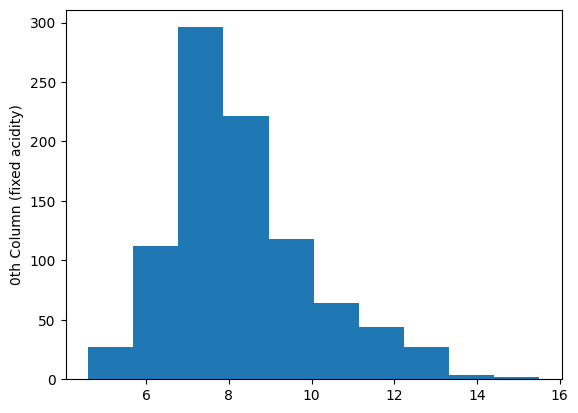

In [66]:
import matplotlib.pyplot as plt

plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (fixed acidity)')
plt.show()

The 0th column 'fixed acidity has values ranging from roughly 3-15, and most are in the 6-10 region.

So, since these values are not in the 0-1 range we want to normalize them. 

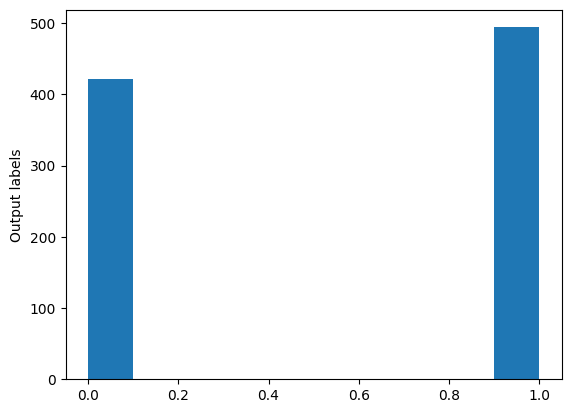

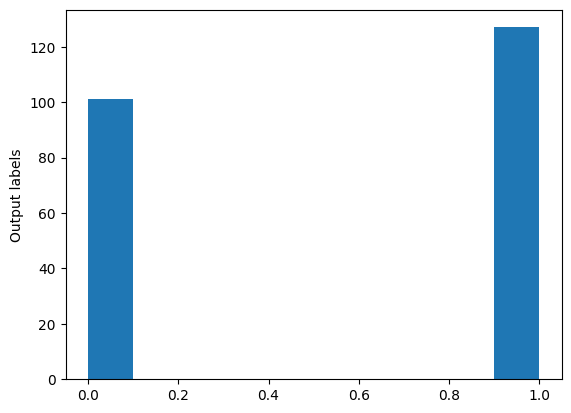

In [67]:
# Check the split of 0's and 1's in our Y-data, aka what we are predicting.

plt.hist(YTRAIN)
plt.ylabel('Output labels')
plt.show()

plt.hist(YTEST)
plt.ylabel('Output labels')
plt.show()

**Baseline Accuracy** is determined by this split, as if you have more of one value than the other the baseline accuracy will be greater than or less than 50%.

Now, lets normalize the data with standardization:

In [68]:
# You obtain the mean and standard deviation from your training data
# Then use those values to normalize your testing data

mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std

XTEST -= mean
XTRAIN /= std

It is important to calculate the mean and std using the training data, and subsequently use the same values for the testing data. Why?
- You only use the training data to calculate mean and std as a **True Test** of the model how it does on testing data using the parameters learned from the training set.

In [69]:
# mean and std are vectors
# So, we can see the mean and std for each feature we have

print(mean)
print(std)

[8.30 0.53 0.27 2.52 0.09 15.82 46.11 1.00 3.31 0.65 10.46]
[1.72 0.18 0.19 1.37 0.04 10.50 32.39 0.00 0.15 0.16 1.08]


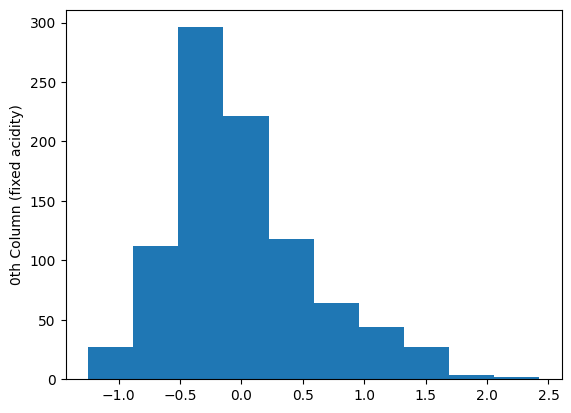

In [70]:
# Now, look at the distribution of values for the same column again. 

plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (fixed acidity)')
plt.show()

---

Step 6: Review the Dimensions of the training & testing sets.

Also previews some of the 'input features' and 'correct labels' for the datasets.

In [71]:
# The number of rows in XTRAIN & YTRAIN must be the same.
print(XTRAIN.shape)
print(YTRAIN.shape)

(915, 11)
(915,)


In [72]:
# Same goes for the testing sets.
print(XTEST.shape)
print(YTEST.shape)

(228, 11)
(228,)


In [74]:
# Print the head (first 3) of the datasets
print(XTRAIN[0:3, ])
print(YTRAIN[0:3])
print(XTEST[0:3, ])
print(YTEST[0:3])

[[1.41 0.98 5.84 -0.07 -13.08 -0.10 -0.02 842.27 -9.78 8.76 0.38]
 [-0.24 -3.68 -0.80 -0.39 -3.55 -0.11 -0.03 -136.50 -1.41 -2.62 -0.83]
 [-0.24 8.12 -1.60 -0.12 0.62 0.05 0.02 -321.67 -8.10 -8.73 -1.09]]
[0.00 0.00 0.00]
[[0.30 0.12 -0.02 -0.52 -0.00 -7.82 -18.11 0.00 -0.03 -0.05 -0.46]
 [1.90 0.12 0.09 -0.72 -0.03 -10.82 -32.11 0.00 -0.14 -0.23 -0.46]
 [-0.70 0.09 0.05 -0.32 -0.00 -8.82 7.89 -0.00 0.05 -0.13 -1.06]]
[1.00 1.00 0.00]
